 # Import necessary libraries

In [9]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Define directories for different soil types


In [3]:
dir_black = os.path.join(r'C:\Users\pinku\OneDrive\Desktop\image_data\Soil types\Black Soil')
dir_Cinder = os.path.join(r'C:\Users\pinku\OneDrive\Desktop\image_data\Soil types\Cinder Soil')
dir_Laterite = os.path.join(r'C:\Users\pinku\OneDrive\Desktop\image_data\Soil types\Laterite Soil')
dir_peat = os.path.join(r'C:\Users\pinku\OneDrive\Desktop\image_data\Soil types\Peat Soil')
dir_yellow = os.path.join(r'C:\Users\pinku\OneDrive\Desktop\image_data\Soil types\Yellow Soil')

# Setting Image Size and Batch Size




In [4]:
# Define image size and batch size
image_size = 220
batch_size = 10
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)


# Importing Image Data Preprocessing Tools



In [5]:

# Create an image data generator
train_datagen = ImageDataGenerator(rescale=1/255)


# Generating Data with ImageDataGenerator



In [6]:
# Generate data from the specified directory
train_generator = train_datagen.flow_from_directory(
    r'C:\Users\pinku\OneDrive\Desktop\image_data\Soil types',
    target_size=(200, 200),
    batch_size=batch_size,
    classes=['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil'],
    class_mode='categorical')


Found 468 images belonging to 5 classes.


# Defining the Deep Learning Model



In [7]:


model = keras.models.Sequential([
    # Convolutional layers for feature extraction
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    # Flatten the results to feed into a dense layer
    keras.layers.Flatten(),

    # Fully connected layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Optional dropout layer to prevent overfitting
    keras.layers.Dense(5, activation='softmax')  # 5 output neurons for 5 classes with softmax activation
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 109, 109, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 128)       0

# Compiling the Model



In [10]:


model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['acc'])


In [9]:
# Define the ImageDataGenerator with resizing and other preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values to the range [0, 1]
    width_shift_range=0.2,  # Optional data augmentation parameters
    height_shift_range=0.2,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2 
)

data_directory = r'C:\Users\pinku\OneDrive\Desktop\image_data\Soil types'

# Create training and validation generators with resizing
train_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(220, 220),  # Resize images to (220, 220)
    batch_size=batch_size,
    classes=['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil'],
    class_mode='categorical',
    subset='training'  
)

# Create a validation generator
validation_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(220, 220),  # Resize images to (220, 220)
    batch_size=batch_size,
    classes=['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil'],
    class_mode='categorical',
    subset='validation'  


Found 375 images belonging to 5 classes.
Found 93 images belonging to 5 classes.


# Training the Model



In [10]:
# Get the total number of samples and set the number of training epochs
total_sample = train_generator.n
n_epochs = 30

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=int(total_sample / batch_size),
    epochs=n_epochs,
    verbose=1)


Epoch 1/30
37/37 [==============================] - 19s 494ms/step - loss: 2.3121 - acc: 0.3178
Epoch 2/30
37/37 [==============================] - 19s 523ms/step - loss: 1.2863 - acc: 0.4630
Epoch 3/30
37/37 [==============================] - 19s 504ms/step - loss: 1.0638 - acc: 0.5890
Epoch 4/30
37/37 [==============================] - 25s 677ms/step - loss: 0.9686 - acc: 0.6466
Epoch 5/30
37/37 [==============================] - 26s 690ms/step - loss: 0.7588 - acc: 0.7397
Epoch 6/30
37/37 [==============================] - 23s 609ms/step - loss: 0.7736 - acc: 0.7507
Epoch 7/30
37/37 [==============================] - 20s 547ms/step - loss: 0.7696 - acc: 0.7452
Epoch 8/30
37/37 [==============================] - 25s 656ms/step - loss: 0.6019 - acc: 0.7836
Epoch 9/30
37/37 [==============================] - 23s 634ms/step - loss: 0.6413 - acc: 0.7918
Epoch 10/30
37/37 [==============================] - 25s 678ms/step - loss: 0.5623 - acc: 0.8000
Epoch 11/30
37/37 [====================

# Visualizing Training Accuracy



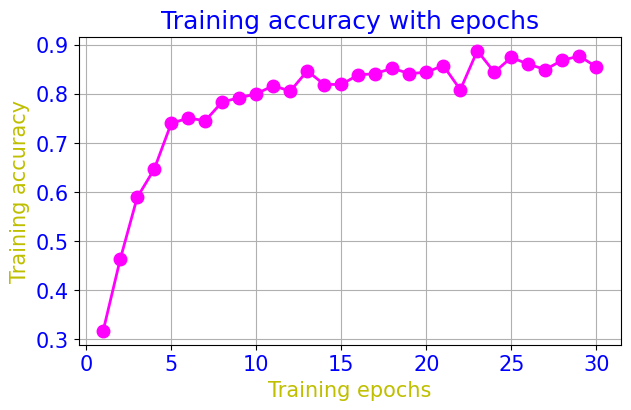

In [27]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have a history object

# Extract training accuracy values from the history object
training_accuracy = history.history['acc']

# Create a list of epoch numbers for the x-axis
epochs = range(1, n_epochs + 1)

# Plot the training accuracy in blue
plt.figure(figsize=(7, 4))
plt.plot(epochs, training_accuracy, '-o', c='magenta', lw=2, markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs", fontsize=18, color='b')
plt.xlabel("Training epochs", fontsize=15, color='y')
plt.ylabel("Training accuracy", fontsize=15, color='y')
plt.xticks(fontsize=15, color='blue')
plt.yticks(fontsize=15, color='blue')
plt.show()


# Saving and Exporting the Model



In [30]:
import tensorflow as tf

# Assuming you have already trained your model and have a model object

# Save the model in TensorFlow SavedModel format
tf.saved_model.save(model, 'C:/Users/pinku/OneDrive/Desktop/image_data/dst1/save_model')

# Optionally, you can also save it as a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_saved_model('C:/Users/pinku/OneDrive/Desktop/image_data/dst1/save_model')
tflite_model = converter.convert()
open("C:/Users/pinku/OneDrive/Desktop/image_data/dst1/soil.tflite", "wb").write(tflite_model)




INFO:tensorflow:Assets written to: C:/Users/pinku/OneDrive/Desktop/image_data/dst1/save_model\assets


INFO:tensorflow:Assets written to: C:/Users/pinku/OneDrive/Desktop/image_data/dst1/save_model\assets


41340160

# Perform Inference on a New Image



In [1]:
import tensorflow as tf
import numpy as np

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=r'C:\Users\pinku\OneDrive\Desktop\image_data\dst1\soil.tflite')
interpreter.allocate_tensors()

# Load and preprocess the input image
image_path = r"C:\Users\pinku\OneDrive\Desktop\image_data\Soil types\Yellow Soil\Yellow_Soil_ (50).jpg"
input_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(220, 220))
input_image = tf.keras.preprocessing.image.img_to_array(input_image)
input_image = input_image / 255.0  # Normalize pixel values (if not already normalized)

# Ensure the input shape matches the model's input shape
input_shape = interpreter.get_input_details()[0]['shape']
input_image = tf.image.resize(input_image, (input_shape[1], input_shape[2]))  # Resize the image

# Add batch dimension
input_image = np.expand_dims(input_image, axis=0)

# Set the input tensor
interpreter.set_tensor(interpreter.get_input_details()[0]['index'], input_image)

# Run inference
interpreter.invoke()

# Get the output tensor
output = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])

# Interpret the predictions
class_names = ['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']
predicted_class = class_names[np.argmax(output)]

# Display the results
print(f'Predicted Class: {predicted_class}')


Predicted Class: Yellow Soil
